# Task 1: Data Wrangling (acquiring) and Pre Processing

## Importing Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

## Loading Data

In [6]:
df=pd.read_csv(r'C:\Users\shwetanksingh\Dropbox\My PC (LAPTOP-02JP5CH0)\Desktop\DS AND ML\kaggle\Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.rename(columns={'Genre':'Gender'},inplace=True)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dropping customer id column as it is irrelevant for us

In [9]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [10]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [11]:
df.shape

(200, 4)

In [12]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Checking missing values

In [13]:
df.isnull().sum()     # Data is already cleaned

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

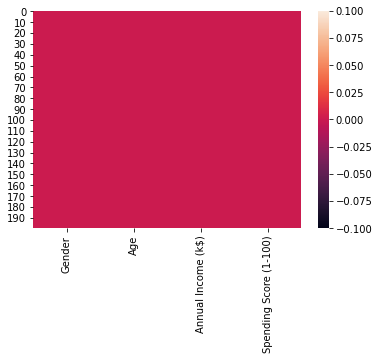

In [14]:
sns.heatmap(df.isnull())  # Graph showing Data is cleaned and no missing values are present

In [15]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Task 2: Data Visualization

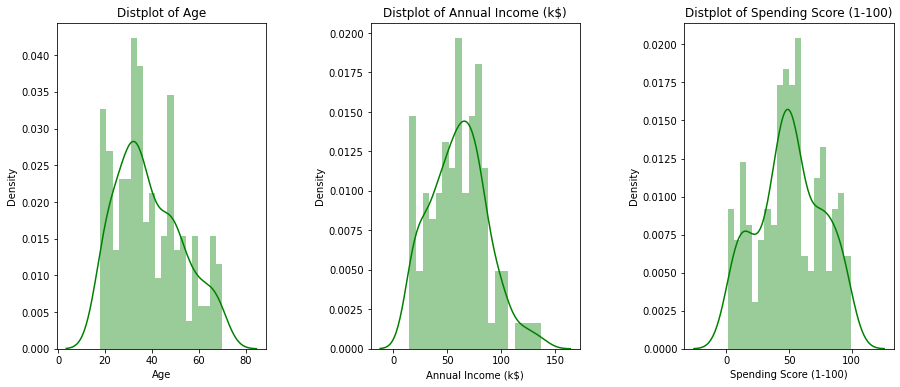

In [16]:
np.warnings.filterwarnings('ignore')
plt.figure(1,figsize=(15,6))
lst=['Age','Annual Income (k$)','Spending Score (1-100)']
n=0
for i in lst:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[i],bins=20, color='green',hist=True) #Graph showing the distribution of numerical attribute in given dataset
    plt.title('Distplot of {}'.format(i))
plt.show()

### Male and Female comparison

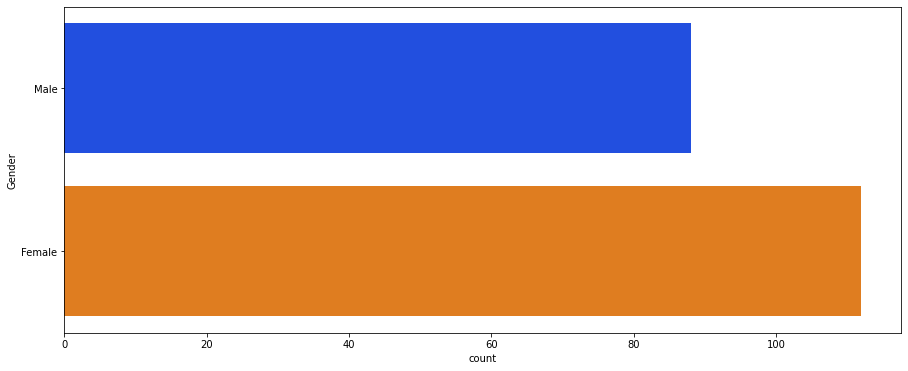

In [17]:
plt.figure(1,figsize=(15,6))
sns.countplot(y='Gender',data=df,palette='bright')
plt.show()

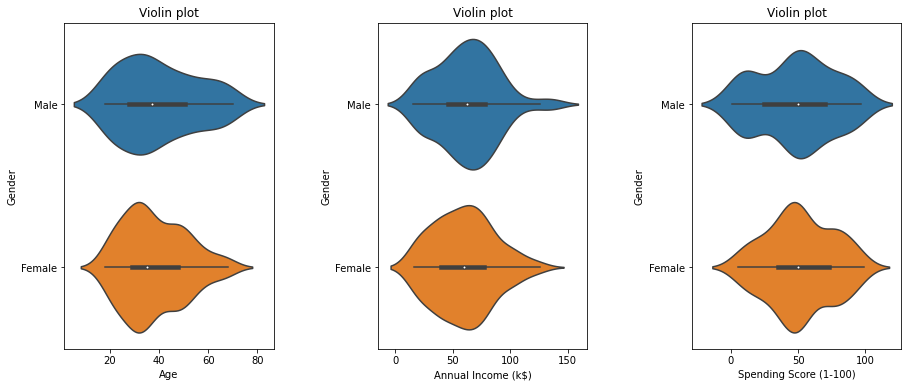

In [18]:
plt.figure(1,figsize=(15,6))
lst=['Age','Annual Income (k$)','Spending Score (1-100)']
n=0
for col in lst:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=col,y='Gender',data=df)
    plt.ylabel('Gender')
    plt.title('Violin plot')
plt.show()

### Let's check which range of age has highest customers

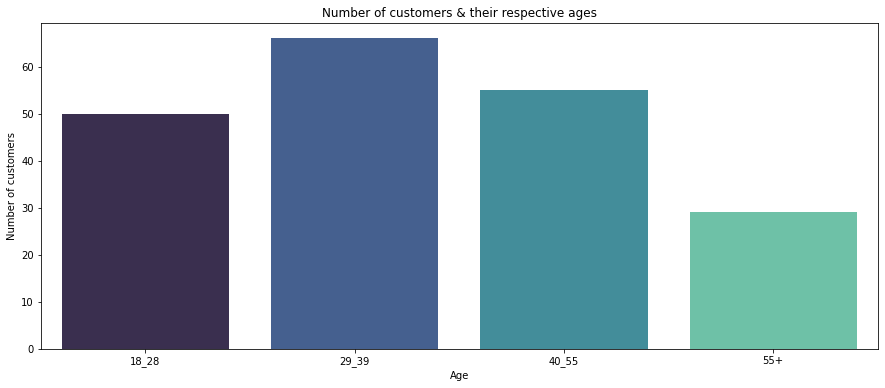

In [19]:
age_18_28=df.Age[(df.Age >=18) & (df.Age<=28)]
age_29_39=df.Age[(df.Age >=29) & (df.Age<=39)]
age_40_55=df.Age[(df.Age>=40) & (df.Age<=55)]
age_55_above=df.Age[df.Age>55]

agex=['18_28','29_39','40_55','55+']
agey=[len(age_18_28.values),len(age_29_39.values),len(age_40_55.values),len(age_55_above.values)]
plt.figure(1,figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.title('Number of customers & their respective ages')
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.show()

### Relationship between annual income and spending score

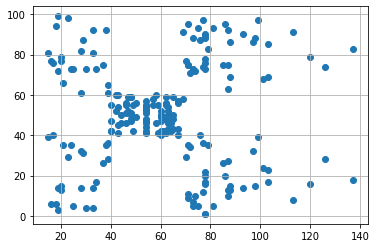

In [20]:
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)']) # we can also use scatterplot
plt.grid()
plt.show()

### Range of spending score

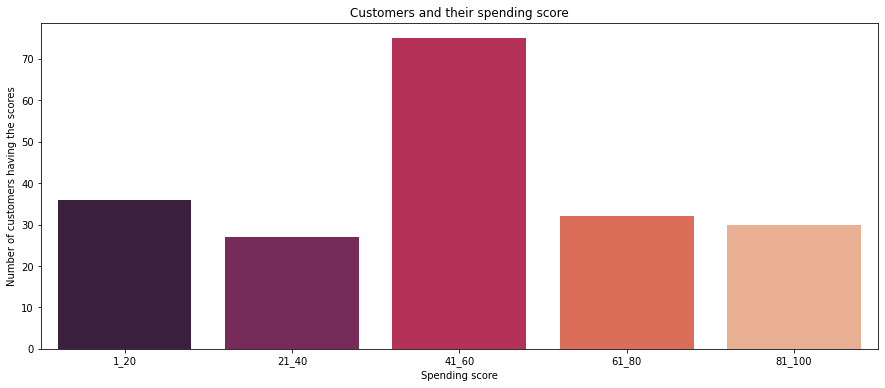

In [21]:
ss_1_20=df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=1) & (df['Spending Score (1-100)']<=20)]
ss_21_40=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21) & (df['Spending Score (1-100)']<=40)]
ss_41_60=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41) & (df['Spending Score (1-100)']<=60)]
ss_61_80=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61)  & (df['Spending Score (1-100)']<=80)]
ss_81_100=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81) & (df['Spending Score (1-100)']<=100)]

ssx=['1_20','21_40','41_60','61_80','81_100']
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(1,figsize=(15,6))
#sns.set_theme(style="whitegrid")
sns.barplot(x=ssx,y=ssy,palette='rocket')
plt.title('Customers and their spending score')
plt.xlabel('Spending score')
plt.ylabel('Number of customers having the scores')
plt.show()

# Task 3: Model Building

## Since data is not labelled so let's apply Clustering Algorithm

## a) We will make clusters based on age and spending score

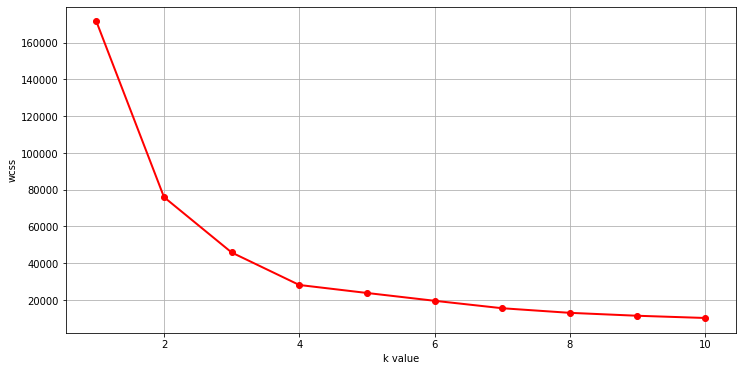

In [22]:
x1=df.loc[:,['Age','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]  # to determine the k value we will calculate wcss(within cluster sum of squared error)
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=1)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,color='red',linewidth=2,marker='o')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.show()

In [23]:
# taking k as 4 ,initialize class object
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=1)

#predict the labels of clusters
label= kmeans.fit_predict(x1)
label


array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 2,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [24]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


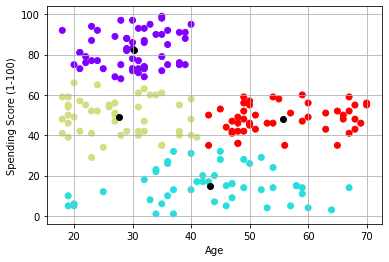

In [25]:
# visualize clusters
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Now we will make clusters based on annual income and spending score

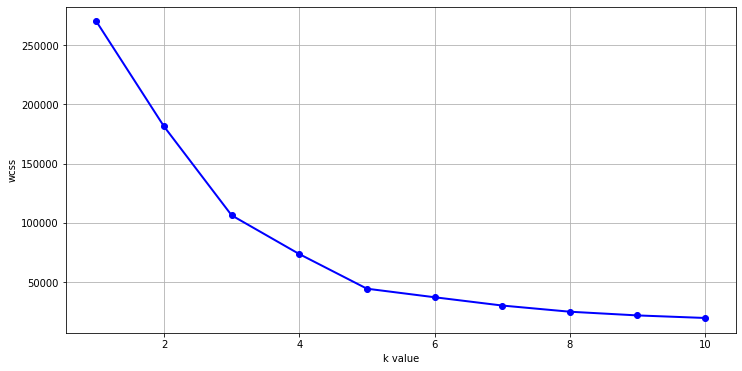

In [26]:
x2=df.iloc[:,[-2,-1]].values

from sklearn.cluster import KMeans
wcss=[]  # to determine the k value we will calculate wcss(within cluster sum of squared error)
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,color='blue',linewidth=2,marker='o')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.show()

In [27]:
# taking k as 5 ,initialize class object
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

#predict the labels of clusters
label2= kmeans.fit_predict(x2)
label2


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [28]:
x2  # we can analyze that sm1 having annual income as 15(k$) and spending score as 39 comes under category 4

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [29]:
#label2==0
x2[label==0,0]  # salary of people in 1st category

array([ 15,  16,  17,  18,  19,  19,  20,  20,  23,  24,  25,  28,  29,
        30,  33,  33,  34,  37,  38,  69,  70,  71,  71,  71,  72,  73,
        73,  74,  75,  76,  77,  77,  78,  78,  78,  78,  78,  78,  79,
        81,  85,  86,  87,  87,  88,  88,  93,  97,  98,  99, 101, 103,
       103, 113, 120, 126, 137], dtype=int64)

In [30]:
x2[label==3,1]  # spending score of people in 4th category

array([35, 36, 55, 52, 60, 45, 41, 50, 46, 46, 56, 52, 59, 51, 50, 48, 55,
       42, 49, 56, 47, 53, 42, 51, 41, 44, 46, 58, 46, 55, 49, 47, 42, 48,
       59, 56, 50, 46, 43, 48, 52, 43, 59, 43, 57, 35, 36, 35],
      dtype=int64)

In [31]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


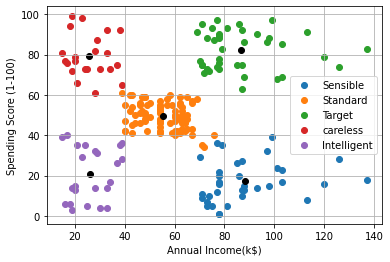

In [32]:
# visualize clusters and Behavioural Analysis based on cluster

plt.scatter(x2[label2==0,0],x2[label2==0,1],label='Sensible')     # cluster 1 i.e. label =0
plt.scatter(x2[label2==1,0],x2[label2==1,1],label='Standard')     # cluster 2 i.e. label= 1
plt.scatter(x2[label2==2,0],x2[label2==2,1],label='Target')       # cluster 3  i.e. label =2
plt.scatter(x2[label2==3,0],x2[label2==3,1],label='careless')     # cluster 4  i.e. label=3
plt.scatter(x2[label2==4,0],x2[label2==4,1],label='Intelligent')  # cluster 5 i.e. label=4

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.legend()
plt.grid()
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Combining all 3 features and populating the clusters

In [47]:
X=df.iloc[:,[1,2,3]].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

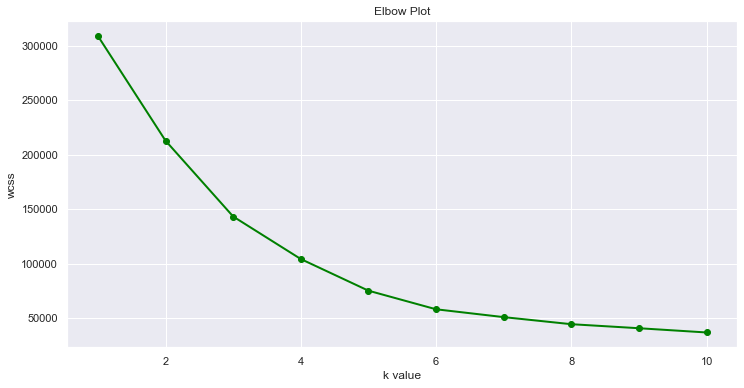

In [51]:
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++',random_state=50)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
sns.set()
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,color='green',linewidth=2,marker='o')
plt.title('Elbow Plot')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.show()

In [56]:
# after k=5 values remain almost constant 

k_means=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=k_means.fit_predict(X)
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

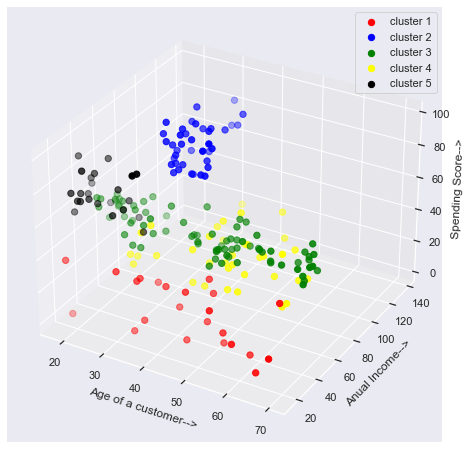

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0,0],X[y == 0,1],X[y == 0,2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(X[y == 1,0],X[y == 1,1],X[y == 1,2], s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(X[y == 2,0],X[y == 2,1],X[y == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(X[y == 3,0],X[y == 3,1],X[y == 3,2], s = 40 , color = 'yellow', label = "cluster 4")
ax.scatter(X[y == 4,0],X[y == 4,1],X[y == 4,2], s = 40 , color = 'black', label = "cluster 5")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

# Task 4: Testing The Model

In [61]:
k_means.predict([[25, 16,  40]]) # If salary is 15 and spending score is 39 it belongs to label 4 (intelligent customer)

array([0])

In [70]:
k_means.predict([[47, 4, 80]])

array([4])

In [64]:
k_means.predict([[29,45, 60]])

array([2])

In [65]:
k_means.predict([[ 50,35, 39]])

array([0])

In [66]:
k_means.predict([[69, 74, 80]])

array([1])

In [67]:
k_means.predict([[19, 84, 20]])

array([3])

In [68]:
k_means.predict([[ 34,14, 70]])

array([4])

In [71]:
k_means.predict([[57,14, 99]])

array([4])

In [72]:
k_means.predict([[31,120, 100]])

array([1])

In [73]:
k_means.predict([[40,94, 10]])

array([3])

# Task 5: Model Quality & Score

In [43]:
from sklearn import metrics

In [74]:
algo=['k-Means']
ss=[metrics.silhouette_score(X,y)]

# Silhouette_score ranges between -1 to 1
# A model performs well when 
comprsn={'Algorithms':algo,'Silhouette_score':ss}
comprsn_df = pd.DataFrame(comprsn)
display(comprsn_df.sort_values(by=['Silhouette_score'],ascending=False))

,Algorithms,Silhouette_score
0,k-Means,0.444286
